# Machine Learning Case Study for Scikit-Learn
### - with Breast Cancer Wisconsin (Original) Data Set : `wisc_bc_data.csv`
--------------------------
### *C. Alex Hu, PhD*    @  `bigDataSpark Forum`  -    *2018/05/10*

=================================
### [ REFERENCE ]  :   

1. #### [05.03-Hyperparameters-and-Model-Validation.ipynb - by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
2. #### [05.02-Introducing-Scikit-Learn.ipynb - by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
    - Both Python notebook files are available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook); the content can be found in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas.
3. #### Brett Lanz, [Machine Learning with R, 2nd ed.](https://github.com/devharsh/Technical-eBooks/blob/master/Machine%20Learning%20with%20R%2C%202nd%20Edition.pdf) Chapter 3, "Example-diagnosing breast cancer with the kNN algorithm", 2015.

------------------------------------

## [ Content ]
- [1.  Importing Raw Data](#1.  Importing Raw Data)
- [2.  產生 feature dataset [X] 和 labeled data [y]](#2.  產生 feature dataset 和 labeled data)
- [3.  Supervised learning example: kNN classification](#3.  Supervised learning example: kNN classification)
    - [ EXERCISE 1  :  如何改進其預測準確率 (accuracy score) 呢？](# EXERCISE 1  :   如何改進其預測準確率呢？)
- [4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset](#4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset)
    - [ EXERCISE 2  :  如何改進其預測準確率 (accuracy score) 呢？ PART 2](# EXERCISE 2  :   如何改進其預測準確率呢？ PART 2) 
- [5.  Unsupervized Learning with Breat-Cancer Feature Dimensionality](#5.  Unsupervized Learning with Breat-Cancer Feature Dimensionality)
- [6.  Unsupervised learning: Gaussian clustering](#6.  Unsupervised learning: Gaussian clustering)

<a id='1. Importing Raw Data'></a>
### 1.  Importing Raw Data
### [ Breast Cancer Wisconsin (Original) Data Set ] : wisc_bc_data.csv

- from UCI Machine Learning Repository :
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [1]:
import numpy as np
import pandas as pd
wsbc = pd.read_csv("wisc_bc_data.csv")   ##  Read & save the dataset as a data frame...
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [2]:
wsbc.describe(include='all')  ##  Raw data including 569 samples and 32 variables

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


<a id='2.  產生 feature dataset 和 labeled data'></a>
### 2.  產生 feature dataset [X] 和 labeled data [y]

In [3]:
y = wsbc['diagnosis']
X = wsbc.drop('id',  axis=1)         ##  Drop the column 'id' ...
X = X.drop('diagnosis', axis = 1)    ##  Drop the column 'diagnosis' for the feature matrix.
## X.head()

#####   
<a id='3.  Supervised learning example: kNN classification'></a>
### 3.  Supervised learning example: kNN classification

- #### Build the kNN model.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- #### Split the raw data into the training & testing datasets.

In [5]:
from sklearn.model_selection import train_test_split
# split the data with 75% in training dataset
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

- #### Fit the model with the training dataset.

In [6]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- #### Predict the result from the model with the features of the tresting dataset.

In [7]:
y2_model = model.predict(X2)

- #### Evaluate the model with the labeled data from the testing dataset.

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.9186046511627907

- #### Compute & plot the confusion matrix to evaluate the accuracy of the kNN classifier.

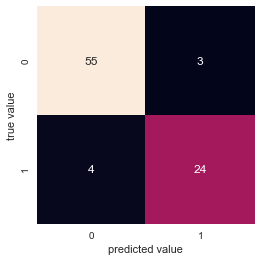

In [9]:
# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, y2_model)

# Plot the confusion matrix as a color-encoded matrix...
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

---------------------------------

<a id=' EXERCISE 1  :   如何改進其預測準確率呢？'></a>
### [ EXERCISE 1 ] :   如何改進其預測準確率 (accuracy score) 呢？
[ HINT] :
- Re-evaluate the model by changing the parameter `n_neighbors` in the `KNeighborsClassifier()` model.  
    - (e.g., *`n_neighbors=3, 5, 21, ...`*)
    
    
- Re-evaluate the model by changing the parameter settings in the `train_test_split()`, such as `random_state`, `train_size`, `test_size`, etc.
    - e.g., *`random_state=1, train_size=0.8, test_size=0.2`*

---------------------------------

#####   
<a id='4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset'></a>
### 4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset
- #### [Scheme 1] : Split the data into five groups and evaluate the accuracy scores with `cross_val_score()`

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.87826087, 0.92173913, 0.91150442, 0.9380531 , 0.94690265])

- #### [Scheme 2] : Leave-One-Out cross validation with `LeaveOneOut()`

In [11]:
from sklearn.cross_validation import LeaveOneOut
score_ones = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
print(score_ones.shape)
score_ones

/Users/macmini1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(569,)


array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

- The leave-one-out cross-validation scores the successful (1.0) or unsuccessful (0.0) prediction result for 569 trials. 
- Accordingly, calculating the mean value of these scores to estimate the error rate as following:

In [12]:
score_ones.mean()

0.9156414762741653

---------------------------------

<a id=' EXERCISE 2  :   如何改進其預測準確率呢？ PART 2'></a>
## [ EXERCISE 2 ] : 如何改進其預測準確率呢？ PART 2
- ### Data Transformation - Normalization/Standardization
   -  一般而言，當資料中的各特徵變數(feature variable)數據範圍差異過大時，通常會先行將所有特徵變數重新正規化(normalization，使其範圍介於 0 與 1 之間)，或者透過計算其 z-score 來重新進行資料的標準化(standardization)。[參考：Reference 3 的 Chapter 3 - Example]

A. 請依據上列敘述，重新將 wisc_bc_data.csv 的資料，先分別

(1) 正規化(normalization，使其範圍介於 0 與 1 之間)

(2) 標準化(standardization with z-score)

之後，分別計算其預測準確率(accuracy score)結果，並比較其差異。

- [ HINT ]:
    - 可以分別撰寫 Python 函數，執行資料正規化(normalization) 和 標準化(standardization with z-score)。
    - 是否可以使用 sklearn 的 Pipeline 以及相關函式來執行資料轉換和建立建立模型呢？

B. 同時，將上述兩項資料轉換後的 kNN 模型，分別進行 cross-validation！

---------------------------------

####   
<a id='5.  Unsupervized Learning with Breat-Cancer Feature Dimensionality'></a>
### 5.  Unsupervized Learning with Breat-Cancer Feature Dimensionality 
- ### Dimension Reduction with PCA

In [13]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions
##  X_2D

In [14]:
wsbc['PCA1'] = X_2D[:, 0]
wsbc['PCA2'] = X_2D[:, 1]
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,PCA1,PCA2
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,-383.867453,8.911869
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,-550.815536,-27.398911
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,-497.867645,-28.827235
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,-523.163457,0.873333
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,-24.214580,80.777953


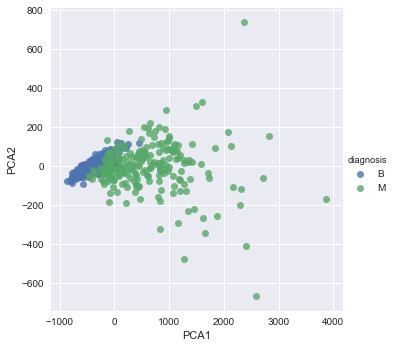

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.lmplot("PCA1", "PCA2", hue='diagnosis', data=wsbc, fit_reg=False);

####   
<a id='6.  Unsupervised learning: Gaussian clustering'></a>
### 6.  Unsupervised learning: Gaussian clustering

In [16]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=2,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gm = model.predict(X)         # 4. Determine cluster labels

In [17]:
y_gm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [18]:
wsbc['cluster'] = y_gm
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,PCA1,PCA2,cluster
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,-383.867453,8.911869,0
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,-550.815536,-27.398911,0
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,-497.867645,-28.827235,0
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,-523.163457,0.873333,0
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,-24.214580,80.777953,0


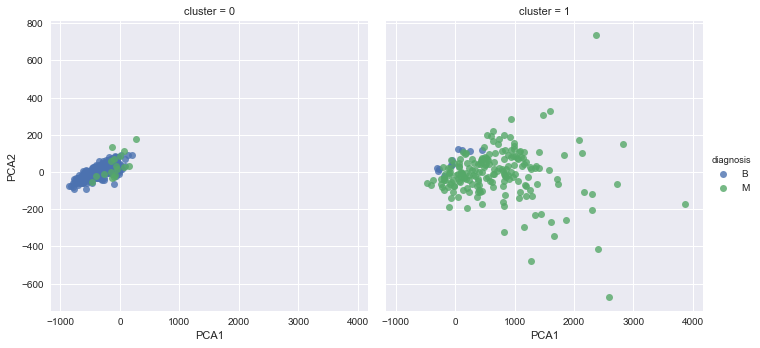

In [19]:
sns.lmplot("PCA1", "PCA2", data=wsbc, hue='diagnosis',
           col='cluster', fit_reg=False);

In [20]:
y_bin = []
for d in y:
    if d == 'B':
        y_bin.append(0)
    else:
        y_bin.append(1)
##  y_bin

In [21]:
accuracy_score(y_bin, y_gm)

0.9507908611599297